# SMS Spam-Ham Classification

## Step 1: Prepare the data

In [1]:
import pandas as pd
import re
import string

In [2]:
msgs = [line.rstrip() for line in open('SMSSpamCollection')]

msgs[:5]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though"]

In [3]:
print(len(msgs))

5574


In [4]:
# Let's print the first ten messages and number them using enumerate:
for msg_no, msg in enumerate(msgs[:10]):
    print(msg_no, msg)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

###### Read data into DATAFRAME

In [5]:
data = pd.read_csv('SMSSpamCollection', sep='\t', header = None)
data.columns = ['label', 'text']

data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###### Remove words with numbers, punctuation and capital letters

In [6]:
alphanumeric = lambda x: re.sub("\w*\d\w*", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
data['text'] = data.text.map(alphanumeric).map(punc_lower)

In [7]:
data.head()

,label,text
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives aro...


###  Split the data (into inputs and outputs) - for Analysis

In [8]:
# split the data into inputs and outputs
X = data.text
y = data.label

In [9]:
X.head(5)

0    go until jurong point  crazy   available only ...
1                        ok lar    joking wif u oni   
2    free entry in   a wkly comp to win fa cup fina...
3    u dun say so early hor    u c already then say   
4    nah i don t think he goes to usf  he lives aro...
Name: text, dtype: object

In [10]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

## Step 2: Split the data (into a training and test set)

In [11]:
# split the data into a training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
X_train.head()

708      quite late lar    ard   anyway i wun b drivin   
4338                        on a tuesday night r u   real
5029    go chase after her and run her over while she ...
4921     g says you never answer your texts  confirm deny
2592         still work going on  it is very small house 
Name: text, dtype: object

In [13]:
y_train.head()

708     ham
4338    ham
5029    ham
4921    ham
2592    ham
Name: label, dtype: object

In [14]:
X_test.head()

3245    squeeeeeze   this is christmas hug   if u lik ...
944     and also i ve sorta blown him off a couple tim...
1044    mmm thats better now i got a roast down me  i...
2484        mm have some kanji dont eat anything heavy ok
812     so there s a ring that comes with the guys cos...
Name: text, dtype: object

In [15]:
y_test.head()

3245    ham
944     ham
1044    ham
2484    ham
812     ham
Name: label, dtype: object

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3900,)
(3900,)
(1672,)
(1672,)


## Step 3: Numerically encode the input data

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

X_train_cv = cv.fit_transform(X_train)     # fit_transform learns the vocab and one-hot encodes
X_test_cv = cv.transform(X_test)           # transform uses the same vocab and one-hot encodes

In [18]:
# print the dimensions of the training & test sets (text messages, terms)
print(X_train_cv.toarray().shape)
print(X_test_cv.toarray().shape)

(3900, 6103)
(1672, 6103)


## A: Using Logistic Regression

## Step 4: Fit model and predict outcomes

In [19]:
# Use a logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Train the model
lr.fit(X_train_cv, y_train)

# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv data
y_pred_cv = lr.predict(X_test_cv)

print(y_pred_cv)

['ham' 'ham' 'ham' ... 'ham' 'spam' 'ham']


C:\Users\750010524\AnacondaInstall\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Step 5: Evaluate the model

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('--------------------------------------------------------')
print('Confusion Matrix \n', confusion_matrix(y_pred_cv, y_test))
print('--------------------------------------------------------')
print('Accuracy Score \n', accuracy_score(y_pred_cv, y_test))
print('--------------------------------------------------------')
print('Accuracy Score \n', classification_report(y_pred_cv, y_test))
print('--------------------------------------------------------')

--------------------------------------------------------
Confusion Matrix 
 [[1448   24]
 [   0  200]]
--------------------------------------------------------
Accuracy Score 
 0.9856459330143541
--------------------------------------------------------
Accuracy Score 
               precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1472
        spam       0.89      1.00      0.94       200

   micro avg       0.99      0.99      0.99      1672
   macro avg       0.95      0.99      0.97      1672
weighted avg       0.99      0.99      0.99      1672

--------------------------------------------------------


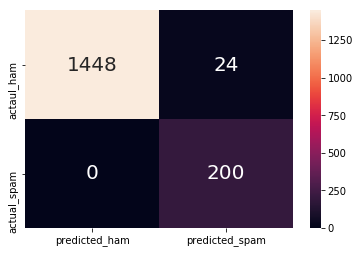

In [21]:
# HEAT MAP

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cm = confusion_matrix(y_pred_cv, y_test)

sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actaul_ham', 'actual_spam']
            ,annot=True, fmt='d', annot_kws={'fontsize':20})

## B: Using Naive Bayes

###### Naive Bayes tends to perform well on text classifications

## Step 4: Fit model and predict outcomes

In [22]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

# Train the model
nb.fit(X_train_cv, y_train)

# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv data
y_pred_cv_nb = nb.predict(X_test_cv)

y_pred_cv_nb

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

## Step 5: Evaluate the model

In [23]:
print('--------------------------------------------------------')
print('Confusion Matrix NB \n', confusion_matrix(y_pred_cv_nb, y_test))
print('--------------------------------------------------------')
print('Accuracy Score NB \n', accuracy_score(y_pred_cv_nb, y_test))
print('--------------------------------------------------------')
print('Accuracy Score NB \n', classification_report(y_pred_cv_nb, y_test))
print('--------------------------------------------------------')

--------------------------------------------------------
Confusion Matrix NB 
 [[1435   10]
 [  13  214]]
--------------------------------------------------------
Accuracy Score NB 
 0.986244019138756
--------------------------------------------------------
Accuracy Score NB 
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1445
        spam       0.96      0.94      0.95       227

   micro avg       0.99      0.99      0.99      1672
   macro avg       0.97      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672

--------------------------------------------------------


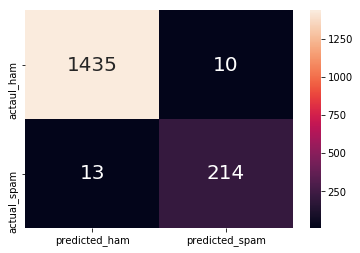

In [24]:
# HEAT MAP

cm_NB = confusion_matrix(y_pred_cv_nb, y_test)

sns.heatmap(cm_NB, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actaul_ham', 'actual_spam']
            ,annot=True, fmt='d', annot_kws={'fontsize':20})